In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import csv
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline
from sklearn import tree
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor


In [2]:
#Classification 
df=pd.read_csv('Carseats_train.csv')
df=df.iloc[:,1:]

High_train=[]
for i in df['Sales']:
    if i < 8:
        High_train.append('NO')
    else:
        High_train.append('YES')

High_train=pd.DataFrame(High_train)
High_train=dict(High_train)
High_train['High'] = High_train.pop(0)

y_train=High_train['High']

df["Urban"] = df["Urban"].astype('category')
df["Urban"] = df["Urban"].cat.codes

df["US"] = df["US"].astype('category')
df["US"] = df["US"].cat.codes

df = pd.get_dummies(df)

X_train = df

y_train

X_train.pop("Sales")
display(X_train.head(), y_train.head())

#Does it need to transform the categorical variables into binary, one_hot_encodeR???


df_test=pd.read_csv('Carseats_test.csv')
df_test=df_test.iloc[:,1:]

High_test=[]
for i in df_test['Sales']:
    if i < 8:
        High_test.append('NO')
    else:
        High_test.append('YES')

High_test=pd.DataFrame(High_test)
High_test=dict(High_test)
High_test['High'] = High_test.pop(0)

y_test=High_test['High']
y_test

df_test["Urban"] = df_test["Urban"].astype('category')
df_test["Urban"] = df_test["Urban"].cat.codes

df_test["US"] = df_test["US"].astype('category')
df_test["US"] = df_test["US"].cat.codes

df_test = pd.get_dummies(df_test)

X_test = df_test
X_test.pop("Sales")

display(X_test.head(), y_test.head())

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,138,73,11,276,120,42,17,1,1,1,0,0
1,111,48,16,260,83,65,10,1,1,0,1,0
2,113,35,10,269,80,59,12,1,1,0,0,1
3,117,100,4,466,97,55,14,1,1,0,0,1
4,141,64,3,340,128,38,13,1,0,1,0,0


0    YES
1    YES
2    YES
3     NO
4     NO
Name: 0, dtype: object

,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,121,86,10,496,145,51,10,1,1,1,0,0
1,122,69,7,303,105,45,16,0,1,0,1,0
2,150,96,0,80,154,61,11,1,0,0,1,0
3,135,110,0,112,117,80,16,0,0,0,0,1
4,106,46,11,414,96,79,17,0,0,1,0,0


0     NO
1    YES
2     NO
3     NO
4     NO
Name: 0, dtype: object

In [2]:

#Regression 


df=pd.read_csv('Carseats_train.csv')

y_train= df.pop("Price")
#print(y)

df["Urban"] = df["Urban"].astype('category')
df["Urban"] = df["Urban"].cat.codes

df["US"] = df["US"].astype('category')
df["US"] = df["US"].cat.codes

df = pd.get_dummies(df)


X_train = df.iloc[:,1:]
#print(X)

display(X_train.head())




df_test=pd.read_csv('Carseats_test.csv')


df_test["Urban"] = df_test["Urban"].astype('category')
df_test["Urban"] = df_test["Urban"].cat.codes

df_test["US"] = df_test["US"].astype('category')
df_test["US"] = df_test["US"].cat.codes

df_test = pd.get_dummies(df_test)



y_test= df_test.pop("Price")
X_test = df_test.iloc[:,1:]

#print(y_test)
#print(X_test)

display(X_test.head())




,Sales,CompPrice,Income,Advertising,Population,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,42,17,1,1,1,0,0
1,11.22,111,48,16,260,65,10,1,1,0,1,0
2,10.06,113,35,10,269,59,12,1,1,0,0,1
3,7.40,117,100,4,466,55,14,1,1,0,0,1
4,4.15,141,64,3,340,38,13,1,0,1,0,0


,Sales,CompPrice,Income,Advertising,Population,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,2.86,121,86,10,496,51,10,1,1,1,0,0
1,11.19,122,69,7,303,45,16,0,1,0,1,0
2,7.74,150,96,0,80,61,11,1,0,0,1,0
3,5.36,135,110,0,112,80,16,0,0,0,0,1
4,6.97,106,46,11,414,79,17,0,0,1,0,0


In [45]:
'''

ohe = OneHotEncoder() #needs removing

ohe.fit_transform(X[["ShelveLoc"]])
ohe.fit_transform(X[["Urban"]])
ohe.fit_transform(X[["US"]])

'''
''

''

In [46]:
'''
column_trans = make_column_transformer(
    (OneHotEncoder(), ["ShelveLoc", "Urban", "US"]), 
    remainder = "passthrough")
'''
''

''

In [47]:
''''
X_new = column_trans.fit_transform(X)
X_new_test = column_trans.fit_transform(X_test)

'''
''

''

In [3]:
#tree_model = DecisionTreeClassifier(criterion = "gini", min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.0048)
#tree_model = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.01)

#Regression
tree_model = DecisionTreeRegressor(min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.01)

#Classification Gini
#tree_model = DecisionTreeClassifier(criterion = "gini", min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.01)

#Classification Entrop
#tree_model = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.01)




tree_model.fit(X_train,y_train)

DecisionTreeRegressor(min_impurity_decrease=0.01, min_samples_leaf=5,
                      min_samples_split=10)

In [4]:
#pipe = make_pipeline(column_trans, tree_model)

In [5]:
#pipe.fit(X,y)

In [6]:
#import sys
#!{sys.executable} -m pip install pydotplus

In [7]:
#from sklearn.tree import export_graphviz

#creates dot file names tree.dot

tree.export_graphviz(
    tree_model,
    out_file="myTreeName.dot", 
    feature_names = list(X_train.columns),
    filled = True, 
    rounded = True
)

In [8]:
def replace_text(obj):
    if type(obj) == matplotlib.text.Annotation:
        txt = obj.get_text()
        txt = re.sub("\nvalue[^$]*]","",txt)
        obj.set_text(txt)
    return obj

In [10]:
import pydot
(graph,) = pydot.graph_from_dot_file('myTreeName.dot')
graph.write_png('CART_tree.png')


In [10]:
'''
tree.export_graphviz(tree_model,out_file="myTreeName.dot", 
    feature_names = ["ShelveLoc_Bad", "ShelvelLoc_Good", "ShelveLoc_Medium", "Urban_yes", "Urban_No", "US_yes", 
                     "US_No", "Sales", "CompPrice", "Income","Advertising", "Population", "Age", "Education"], 
                    filled = True, 
                    rounded = True)
'''
''

''

In [11]:
#tree.plot_tree(tree_model)

In [12]:
'''
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,3), dpi=1000)
tree.plot_tree(tree_model,
               feature_names =  ["ShelveLoc_Good", "ShelvelLoc_Medium", "ShelveLoc_Bad", "Urban_yes", "Urban_No", "US_yes", 
                     "US_No", "Sales", "CompPrice", "Income","Advertising", "Population", "Age", "Education"],  
               filled = True,
               label = "none");
fig.savefig('imagename.png')

#class_names=cn

def replace_text(obj):
    if type(obj) == matplotlib.text.Annotation:
        txt = obj.get_text()
        txt = re.sub("\nvalue[^$]*]","",txt)
        obj.set_text(txt)
    return obj
    
ax.properties()['children'] = [replace_text(i) for i in ax.properties()['children']]
fig.savefig('imagename2.png')
fig.show()
'''
''

''

In [13]:
'''
import pydotplus as pydot # pydot library: install it via pip install pydot
import re
tree.export_graphviz(tree_model,out_file="myTreeName.dot", 
    feature_names = ["ShelveLoc_Good", "ShelvelLoc_Medium", "ShelveLoc_Bad", "Urban_yes", "Urban_No", "US_yes", 
                     "US_No", "Sales", "CompPrice", "Income","Advertising", "Population", "Age", "Education"], 
                    filled = True, 
                    rounded = True)

#PATH = '/path/to/dotfile/tree.dot'
f = pydot.graph_from_dot_file("myTreeName.dot").to_string()
f = re.sub('(\\\\nsamples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+, [0-9]+\])', '', f)
f = re.sub('(samples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+, [0-9]+\])\\\\n', '', f)

with open('tree_modified.dot', 'w') as file:
    file.write(f)

'''
''

''

In [14]:
'''
import matplotlib

fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (1,1), dpi=2400)
tree.plot_tree(tree_model,
               ax = ax,
               feature_names =  ["ShelveLoc_Good", "ShelvelLoc_Medium", "ShelveLoc_Bad", "Urban_yes", "Urban_No", "US_yes", 
                     "US_No", "Sales", "CompPrice", "Income","Advertising", "Population", "Age", "Education"],  
               filled = True);
fig.savefig('imagename2.png')

def replace_text(obj):
    if type(obj) == matplotlib.text.Annotation:
        txt = obj.get_text()
        txt = re.sub("\nvalue[^$]*]","",txt)
        obj.set_text(txt)
    return obj
    
ax.properties()['children'] = [replace_text(i) for i in ax.properties()['children']]
fig.savefig('imagename2.png')
fig.show()
'''
""

''

In [10]:
print(tree_model.get_depth())
print(tree_model.get_n_leaves())
print(tree_model.get_params)



9
44
<bound method BaseEstimator.get_params of DecisionTreeRegressor(min_impurity_decrease=0.01, min_samples_leaf=5,
                      min_samples_split=10)>


In [11]:
print(tree_model.score(X_train, y_train))
print(tree_model.score(X_test, y_test))

0.787938506468895
0.34069858200824754


In [12]:
pred_x = tree_model.predict(X_test)

mse = 0
for i in range(len(pred_x)):
    mse += (y_test[i]-pred_x[i])**2

print(mse/len(y_test))

374.4062411357288


In [13]:
#Reducing ccp terms

#tree_model = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.01)

#tree_model =  DecisionTreeClassifier(criterion = "gini", min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.0048)

#Regression
tree_model = DecisionTreeRegressor(min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.01)#, ccp_alpha=alpha[1])
#Classification Gini
#tree_model = DecisionTreeClassifier(criterion = "gini", min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.01)
#Classification Entropy
#tree_model = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.01)




path = tree_model.cost_complexity_pruning_path(X_train, y_train) #the tree in example was unfited 
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas, impurities)
#len(ccp_alphas)

new_ccp =[]
for i in range(len(ccp_alphas)):
    new_ccp.append([i,ccp_alphas[i]])
    
    
new_ccp2= []
ccp_val = 0
nodes = 0

for i in new_ccp:
    if i[1] > ccp_val + 0.000001: #001
        ccp_val = i[1]
        new_ccp2.append(i)
        
new_ccp2
new_ccp2.insert(0, [0,0])
new_ccp2

[  0.           0.30035714   0.49100649   0.58477891   0.63
   0.64731456   0.69822511   0.94297619   0.96571429   1.10125313
   1.33761905   1.4532967    1.51053258   1.87041667   1.95116071
   2.13020975   2.32161531   2.35636054   2.50722961   2.66274351
   3.05134092   3.20387536   3.26769709   3.41305272   3.93888017
   4.06087936   4.17959184   5.17593006   5.30012866   5.52249063
   7.38293651   7.47243321   8.29818667  14.88337268  16.73635032
  19.63929627  20.32031746  30.8400115   53.98845134  56.87554192
 112.35806667] [117.79018141 118.09053855 118.58154504 119.16632395 119.79632395
 120.44363851 121.14186362 122.08483981 123.0505541  124.15180723
 125.48942628 126.94272298 128.45325556 130.32367223 132.27483294
 134.4050427  136.72665801 139.08301855 141.59024816 144.25299167
 147.30433259 156.91595867 160.18365576 163.59670848 167.53558865
 171.59646801 175.77605985 180.95198991 186.25211857 191.7746092
 199.15754571 206.62997891 214.92816558 244.69491094 261.43126127
 2

[[0, 0],
 [1, 0.3003571428571381],
 [2, 0.4910064935065943],
 [3, 0.5847789115646198],
 [4, 0.6299999999999794],
 [5, 0.6473145604393986],
 [6, 0.6982251082251425],
 [7, 0.9429761904762017],
 [8, 0.965714285714447],
 [9, 1.101253132832003],
 [10, 1.3376190476190977],
 [11, 1.4532967032966493],
 [12, 1.5105325814538109],
 [13, 1.8704166666667206],
 [14, 1.951160714285698],
 [15, 2.1302097505669604],
 [16, 2.3216153127917094],
 [17, 2.35636054421758],
 [18, 2.507229612492937],
 [19, 2.6627435064934275],
 [20, 3.051340920983746],
 [21, 3.2038753607502835],
 [22, 3.2676970855231833],
 [23, 3.4130527210884445],
 [24, 3.9388801674515186],
 [25, 4.060879361866149],
 [26, 4.179591836734886],
 [27, 5.175930059523774],
 [28, 5.300128660159757],
 [29, 5.5224906308681625],
 [30, 7.3829365079364955],
 [31, 7.472433207152974],
 [32, 8.298186667829285],
 [33, 14.883372682005511],
 [34, 16.736350323425],
 [35, 19.639296270232656],
 [36, 20.320317460317554],
 [37, 30.840011500461586],
 [38, 53.98845133

In [19]:
    #testing station
    '''
    #new_model = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.01,  ccp_alpha=ccp_alphas[0])

    #new_model =  DecisionTreeClassifier(criterion = "gini", min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.0048, ccp_alpha=new_ccp2[0][1])
    new_model = DecisionTreeRegressor(min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.001, ccp_alpha=alpha[1])

    
    new_model.fit(X_train, y_train)
    
    pred_x_train = new_model.predict(X_train)
    pred_x_train
    
    mse_train = 0
    for i in range(len(pred_x_train)):
        mse_train += (y_train[i]-pred_x_train[i])**2
    print(mse_train/len(y_train))
    
    pred_x_test = new_model.predict(X_test)
    pred_x_test
    
    mse_test = 0
    for i in range(len(pred_x_test)):
        mse_test += (y_test[i]-pred_x_test[i])**2
    print(mse_test/len(y_test))
    '''

'\n#new_model = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.01,  ccp_alpha=ccp_alphas[0])\n\n#new_model =  DecisionTreeClassifier(criterion = "gini", min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.0048, ccp_alpha=new_ccp2[0][1])\nnew_model = DecisionTreeRegressor(min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.001, ccp_alpha=alpha[1])\n\n\nnew_model.fit(X_train, y_train)\n\npred_x_train = new_model.predict(X_train)\npred_x_train\n\nmse_train = 0\nfor i in range(len(pred_x_train)):\n    mse_train += (y_train[i]-pred_x_train[i])**2\nprint(mse_train/len(y_train))\n\npred_x_test = new_model.predict(X_test)\npred_x_test\n\nmse_test = 0\nfor i in range(len(pred_x_test)):\n    mse_test += (y_test[i]-pred_x_test[i])**2\nprint(mse_test/len(y_test))\n'

In [21]:
list_train =[]
list_test =[]




for alpha in new_ccp2:# ccp_alphas:
    #new_model =  DecisionTreeClassifier(criterion = "gini", min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.0048, ccp_alpha=alpha[1])
    
    #new_model = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 10, min_samples_leaf=5,min_impurity_decrease = 0.01,  ccp_alpha=alpha[1])

    #Regression
    new_model = DecisionTreeRegressor(min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.01, ccp_alpha=alpha[1])
    #Classification gini
    #new_model = DecisionTreeClassifier(criterion = "gini", min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.01, ccp_alpha=alpha[1])
    #Classification entropy
    #new_model = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.01, ccp_alpha=alpha[1])
    
    new_model.fit(X_train, y_train)
    
    pred_x_train = new_model.predict(X_train)
    pred_x_test = new_model.predict(X_test)
    
    
    '''   
    missclass_train = 0
    
    for i in range(len(pred_x_train)):
        if y_train[i] != pred_x_train[i]:
            missclass_train+=1
    list_train.append([missclass_train, new_model.get_n_leaves()])

    
    missclass_test = 0 

    for i in range(len(pred_x_test)):
        if y_test[i] != pred_x_test[i]:
            missclass_test+=1
    list_test.append([missclass_test, new_model.get_n_leaves()])

print(list_train)
print(list_test)
    
    '''
    mse_train = 0
    for i in range(len(pred_x_train)):
        mse_train += (y_train[i]-pred_x_train[i])**2

    list_train.append([mse_train/len(y_train),new_model.get_n_leaves()])
    
    mse_test = 0
    for i in range(len(pred_x_test)):
        mse_test += (y_test[i]-pred_x_test[i])**2

    list_test.append([mse_test/len(y_test),new_model.get_n_leaves()])

print(list_train)    
print(list_test)


    
x1 = []
y1 =[]
min = 1000 
min_leaves = 1000 
for i in range(len(list_test)):
    x1.append(list_test[i][1])
    y1.append(list_test[i][0])
    if list_test[i][0] < min:
        min = list_test[i][0]
        min_leaves = list_test[i][1]

x2 = []
y2 = []
for i in range(len(list_train)):
    x2.append(list_train[i][1])
    y2.append(list_train[i][0])
print("")
print(f"Minimum mse = {min} with minimum leaves = {min_leaves}")



[[117.79018140589568, 44], [118.09053854875285, 43], [118.58154504225934, 42], [119.166323953824, 41], [119.79632395382399, 40], [120.44363851426357, 39], [121.14186362248867, 38], [122.08483981296486, 37], [123.05055409867914, 36], [124.15180723151123, 35], [125.48942627913026, 34], [126.94272298242696, 33], [128.4532555638806, 32], [130.32367223054723, 31], [132.27483294483298, 30], [134.40504269539989, 29], [136.72665800819166, 28], [136.72665800819166, 28], [141.59024816490216, 26], [144.25299167139565, 25], [147.30433259237938, 24], [156.9159586746305, 21], [160.1836557601536, 20], [163.59670848124208, 19], [167.53558864869368, 18], [171.5964680105599, 17], [175.77605984729456, 16], [180.95198990681834, 15], [186.25211856697808, 14], [191.77460919784582, 13], [199.15754570578233, 12], [206.6299789129361, 11], [214.9281655807656, 10], [244.69491094477672, 8], [261.4312612682012, 7], [281.07055753843326, 6], [301.3908749987507, 5], [332.2308864992127, 4], [386.2193378364982, 3], [44

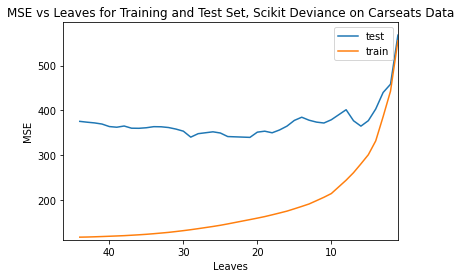

In [22]:
import numpy as np
import matplotlib.pyplot as plt

'''
# values from R classification misclass - deviation
#dict_test = {19:32,  16:32,  13:32,   11:34,   7:44,  4:37,   2:37} #Test
#dict_train = {19:24,  16:24,  13:26,   11:31,   7:42,  4:59,   2:80}  #train

#R deviance regression
#dict_test = {13:378.2664,  12:374.0569,  11:372.0732,   10:379.3271,   8: 401.6294 , 7:377.1002, 6: 365.1234, 5:377.2487,  4:403.2813, 3:440.0371,    2: 458.5094}#Test
#dict_train = {13:191.7746,  12:199.1575,  11:206.63 ,   10:214.9282,   8:244.6949 , 7:261.4313, 6: 281.0706 , 5:301.3909,  4:332.2309, 3:386.2193,    2:443.0949}  #train

#R classification Gini
dict_test = {28:43, 16:43, 14:41, 12:38, 11:36,  7:34,  6:36,  4:37,  3:36} #    #test
dict_train = {28:32, 16:32, 14:33, 12:35, 11:37,  7:49,  6:54,  4:74,  3:85} # #train


x1 = list(dict_test.keys())
y1 = list(dict_test.values())
x2 = list(dict_train.keys())
y2 = list(dict_train.values())
'''

plt.plot(x1, y1, label = "test")
plt.plot(x2, y2, label = "train")



plt.xlabel('Leaves')
plt.ylabel('MSE')
plt.title("MSE vs Leaves for Training and Test Set, Scikit Deviance on Carseats Data")
        
plt.legend()



plt.axis([np.max(x1+x2)*1.05, np.min(x1+x2)*.95, np.min(y1+y2)*0.95, np.max(y1+y2)*1.05])

#plt.xticks([26, 22, 18, 14, 10, 6])

plt.show()


## Print pruned tree

In [23]:
#new_model = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 10, min_samples_leaf=5,min_impurity_decrease = 0.01,  max_leaf_nodes = 4)
#new_model =  DecisionTreeClassifier(criterion = "gini", min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.0048, max_leaf_nodes = 13)

#regression
new_model = DecisionTreeRegressor(min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.01, max_leaf_nodes = 21)
#classification gini
#new_model = DecisionTreeClassifier(criterion = "gini", min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.001,  max_leaf_nodes = 23)
#classification entropy
#new_model = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.001,  max_leaf_nodes = 17)



new_model.fit(X_train, y_train)


tree.export_graphviz(
    new_model,
    out_file="myTreeName.dot", 
    feature_names = list(X_train.columns),
    filled = True, 
    rounded = True
)

In [24]:
import pydot
'''
dot_string = """graph my_graph {
    bgcolor="yellow";
    a [label="Foo"];
    b [shape=circle];
    a -- b -- c [color=blue];
}"""

graphs = pydot.graph_from_dot_file('tree.dot')
graph = graphs[0]
graph.write_png('pracgraph.png')
'''
(graph,) = pydot.graph_from_dot_file('myTreeName.dot')
graph.write_png('CART_tree.png')

In [163]:
clfs = []
for ccp_alpha in ccp_alphas:
    #clf = DecisionTreeClassifier(criterion = "gini", min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.0048, max_depth = 6, random_state=0, ccp_alpha=ccp_alpha)
    
    clf = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 10, min_samples_leaf=5, min_impurity_decrease = 0.01, max_depth = 6, random_state=0, ccp_alpha=ccp_alpha)
    
    clf.fit(X_new, y)

    
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

NameError: name 'X_new' is not defined

In [ ]:
train_scores = [] 
leaves = []
test_scores = []
for clf in clfs:
    train_scores.append(clf.score(X_new,y))
    leaves.append(clf.get_n_leaves())
    test_scores.append(clf.score(X_new_test,y_test))

  
    
fig, ax = plt.subplots()
ax.set_xlabel("leaves")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(leaves, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(leaves, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [5]:
import pydot

graph = pydot.Dot("my_graph", graph_type="graph", bgcolor="yellow", dir="forward", shape="plaintext", spines = "line")

# Add nodes
my_node = pydot.Node("a", label="Foo")
graph.add_node(my_node)
# Or, without using an intermediate variable:
graph.add_node(pydot.Node("b", shape="circle"))

# Add edges
my_edge = pydot.Edge("a", "b", color="blue")
graph.add_edge(my_edge)
# Or, without using an intermediate variable:
graph.add_edge(pydot.Edge("b", "c", color="blue"))

graph.write("the.dot")

#graphs = pydot.graph_from_dot_data(dot_string)
#graph = graphs[0]

True

In [2]:
!pip install pygraphviz

Defaulting to user installation because normal site-packages is not writeable
  Running setup.py clean for pygraphviz
Failed to build pygraphviz
    Running setup.py install for pygraphviz: started
    Running setup.py install for pygraphviz: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'D:\Program_Files\Anaconda\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\danie\\AppData\\Local\\Temp\\pip-install-nojvphxw\\pygraphviz_b5fca58dfb1e44fda565dbcb07585acf\\setup.py'"'"'; __file__='"'"'C:\\Users\\danie\\AppData\\Local\\Temp\\pip-install-nojvphxw\\pygraphviz_b5fca58dfb1e44fda565dbcb07585acf\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\danie\AppData\Local\Temp\pip-wheel-wg0c8q1x'
       cwd: C:\Users\danie\AppData\Local\Temp\pip-install-nojvphxw\pygraphviz_b5fca58dfb1e44fda565dbcb07585acf\
  Complete output (47 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\pygraphviz
  copying pygraphviz\agraph.py -> build\lib.win-amd64-3

In [4]:
import pygraphviz as pgv
import networkx as nx
import matplotlib.pyplot as plt
Gtmp = pgv.AGraph('tree.dot')
G = nx.Graph(Gtmp)
nx.draw(G)
plt.show()

ModuleNotFoundError: No module named 'pygraphviz'

NetworkXError: random_state_index is incorrect

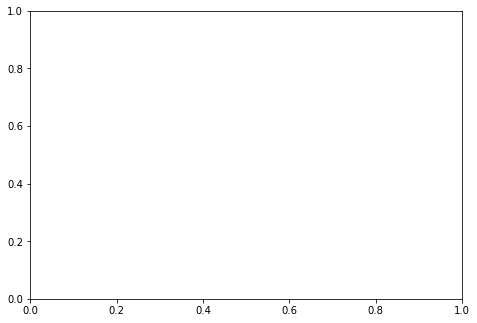

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph(random_state_index = 1)
G.add_edge('1','2')
nx.draw(G)
plt.show()

In [86]:
import igraph
from igraph import Graph, EdgeSeq

father_list = sorted([16, 17, 18, 19, 10, 23, 44, 45, 12, 13, 15, 28, 29, 1, 2, 4, 8, 9, 5, 11, 22, 3, 6, 7, 14])

nr_vertices = max(father_list) #make too many to allow for missing nodes

v_label = list(map(str, father_list) )                    # create node labbels 


G = Graph.Tree(nr_vertices, 2) # 2 stands for children number
lay = G.layout_reingold_tilford(root=[0])



position = {k: lay[k-1] for k in father_list}    #assigning nodes to positions 

Y = [lay[k][1] for k in range(len(father_list))]
M = max(Y)

es = EdgeSeq(G) # sequence of edges
E = [e.tuple for e in G.es] # list of edges


L = len(position)
Xn = [position[k][0] for k in father_list]
Yn = [2*M-position[k][1] for k in father_list]



a = 0
while a<10:

    for edge in E:
        if edge[0] +1 not in position or edge[1]+1 not in position:
            E.remove(edge) 
    a+=1

Xe = []
Ye = []



for edge in E:
    
    
    Xe+=[position[edge[0]+1][0],position[edge[1]+1][0], None]
    Ye+=[2*M-position[edge[0]+1][1],2*M-position[edge[1]+1][1], None]



for label in v_label:
    print(label)
    print(type(label))
    
labels = v_label



#Drawing

import plotly.graph_objects as go
fig = go.Figure()
#fig.add_annotation(name="Graph")
fig.add_trace(go.Scatter(x=Xe,
                   y=Ye,
                   mode='lines',
                   line=dict(color='rgb(210,210,210)', width=1),
                   hoverinfo='none'
                   ))
fig.add_trace(go.Scatter(x=Xn,
                  y=Yn,
                  mode='markers',
                  name='Nodes',
                  marker=dict(symbol='circle-dot',
                                size=18,
                                color='#6175c1',    #'#DB4551',
                                line=dict(color='rgb(50,50,50)', width=1)
                                ),
                  text=labels,
                  hoverinfo='text',
                  opacity=0.8
                  ))

1
<class 'str'>
2
<class 'str'>
3
<class 'str'>
4
<class 'str'>
5
<class 'str'>
6
<class 'str'>
7
<class 'str'>
8
<class 'str'>
9
<class 'str'>
10
<class 'str'>
11
<class 'str'>
12
<class 'str'>
13
<class 'str'>
14
<class 'str'>
15
<class 'str'>
16
<class 'str'>
17
<class 'str'>
18
<class 'str'>
19
<class 'str'>
22
<class 'str'>
23
<class 'str'>
28
<class 'str'>
29
<class 'str'>
44
<class 'str'>
45
<class 'str'>


In [1]:
def fun():
    print(cat)
    
fun

<function __main__.fun()>